## AgriSmart AI data analysis of climate action

### objectives
1. Fill in missing values
2. Correct wrong data formats
3. Remove duplicate values 
4. Clean the data and print cleaned work

Will start by exploring my dataset to have an outlook of it

In [263]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [264]:
# Load the dataset
df = pd.read_csv('files/climate_action_data.csv')
print(df.head())

  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3       IMG-2003

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [266]:
# data exploration
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1056,2025-02-26,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2056
freq,2,2,5,11,13,8,203,8,11,2


In [267]:
print(df.shape)
print(df.dtypes)

(913, 10)
Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object


Solving misssing values issue

In [268]:
#check for missing values
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [269]:
 # Fixing dates on Date column
from datetime import datetime
 
# Convert 'Date' column to datetime format, coercing errors to NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(df.isnull().sum())

# looking at my dataset again my dates are increamting in days 
# fill in NaT values by incramenting by 1 day to the previous date
if df['Date'].isnull().any():
    # Get the index of the first NaT value
    first_nat_index = df['Date'].isnull().idxmax()
    
    # Fill NaT values by incrementing the previous date by 1 day
    for i in range(first_nat_index, len(df)):
        if pd.isnull(df.loc[i, 'Date']):
            df.loc[i, 'Date'] = df.loc[i - 1, 'Date'] + pd.Timedelta(days=1)
            
# Check if there are still any NaT values
print(df['Date'].isnull().sum())


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64
0


In [270]:
# Filling in missing values in Crop_Type column using mode since its non-numeric
df['Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])
# Check if there are still any missing values
print(df['Crop_Type'].isnull().sum())

0


In [271]:
print(df.isnull().sum())
print(df.shape)

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64
(913, 10)


Removing Duplicate values 

In [272]:
# Check for duplicate values 
print(df.duplicated().sum())


112


In [273]:
# Removing Duplicate values
df = df.drop_duplicates()

print(df.duplicated().sum())
print(df.shape)

0
(801, 10)


Removing incorrect data formats

In [274]:
# checking erroneous entries with 'error' in all columns
error_entries = df[df.apply(lambda x: x.astype(str).str.contains('error', case=False, na=False).any(), axis=1)]
# Display the erroneous entries
print("Erroneous entries:")
print(error_entries)

Erroneous entries:
    Sensor_ID       Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
107  SEN-1107 2025-04-18            error   error          error       error   
118  SEN-1118 2025-04-29            error   error          error       error   
244  SEN-1244 2025-09-02            error   error          error       error   
459  SEN-1459 2026-04-05            error   error          error       error   
683  SEN-1683 2026-11-15            error   error          error       error   

    Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
107  Tomatoes                         error                      error   
118     Beans                         error                      error   
244     Wheat                         error                      error   
459   Lettuce                         error                      error   
683     Maize                         error                      error   

    Drone_Image_ID  
107       IMG-2107  
118       IMG

In [275]:
# Replacing erroneous entries with NaN
df.replace(to_replace='error', value=np.nan, inplace=True)
# Check if there are still any erroneous entries
print(df.isin(['error']).sum().sum())

print(df.isnull().sum())

0
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [276]:
# Since only numeric columns had erroneous entries, we can fill NaN values with the mean of each column
# Specifying the columns to fill NaN values with their mean
numeric_columns = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]

# Convert specified columns to numeric (if not already), coercing errors to NaN
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill NaN values in these columns with their mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

#check for any remaining NaN values
print(df.isnull().sum())
print(df.shape)


Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64
(801, 10)


Descriptive statistics

In [277]:

df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,801,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,2026-02-04 00:17:58.651685632,44.800050,6.248279,26.469472,60.047990,87.487186,17.384171
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-19 00:00:00,26.970000,5.330000,22.300000,46.000000,57.900000,11.300000
50%,2026-02-04 00:00:00,45.240000,6.248279,26.600000,59.900000,86.000000,17.384171
75%,2026-08-23 00:00:00,62.560000,7.080000,30.600000,75.300000,117.700000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.447882,1.022107,4.859914,17.424253,34.782903,7.140991


 Histograms

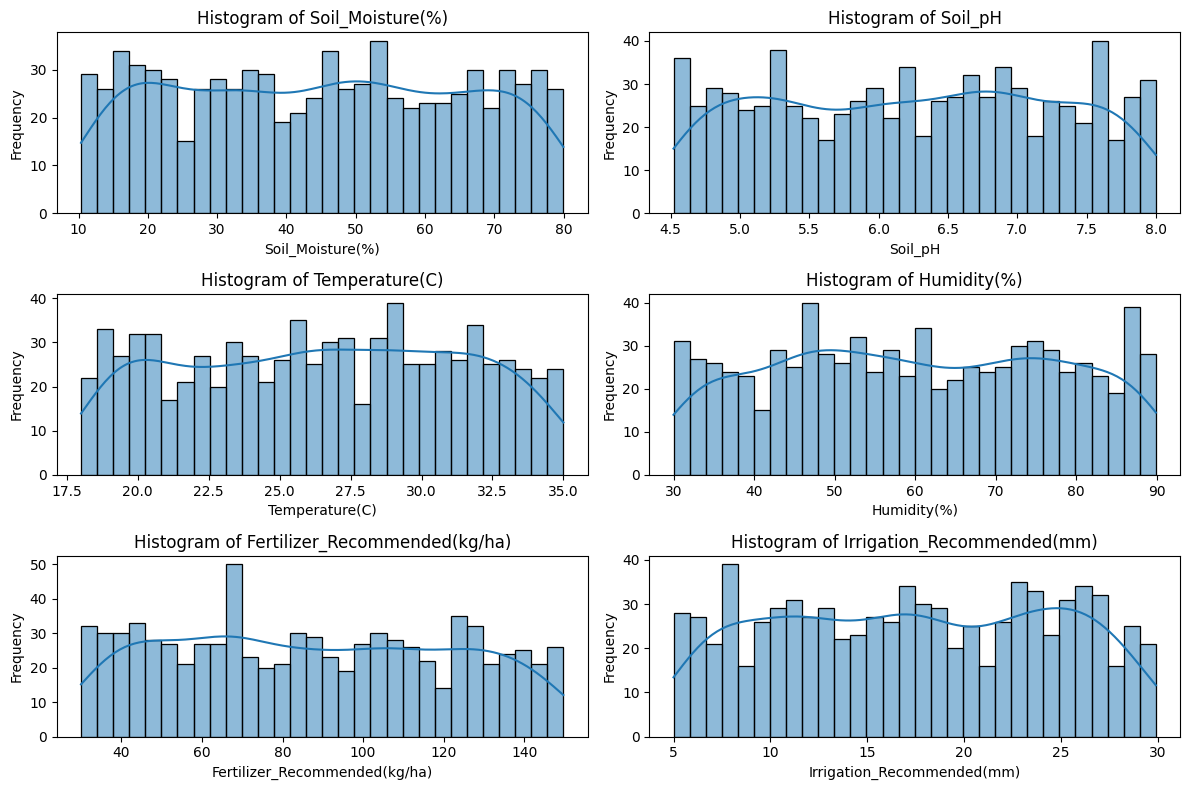

In [278]:

#setting up the figure size
plt.figure(figsize=(12, 8))

# Plotting histograms for each numeric column
for column in numeric_columns:
    plt.subplot(3, 2, numeric_columns.index(column) + 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Correlation 


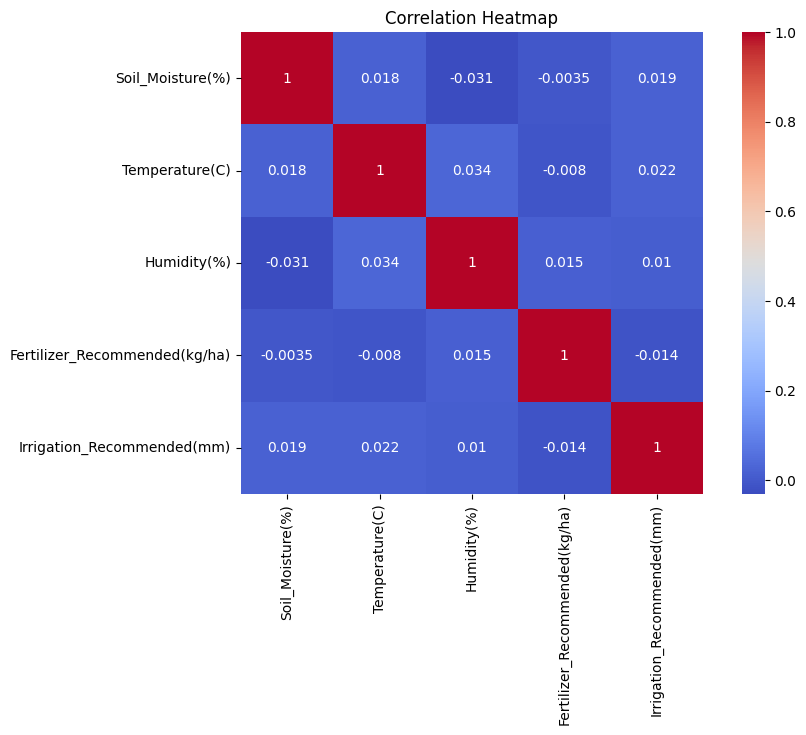

In [279]:
# correlation heatmap to examine the relationships between soil and environmental variables. 
corr = df[['Soil_Moisture(%)', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [280]:
#displaying the correlation values of each variable with Fertilizer_Recommended(kg/ha)
fert_corr = corr['Fertilizer_Recommended(kg/ha)'].drop('Fertilizer_Recommended(kg/ha)')
print("Correlation with Fertilizer_Recommended(kg/ha):")
print(fert_corr)

# The variable with the highest absolute correlation (excluding itself) will most influence fertilizer recommendation
most_influential = fert_corr.abs().idxmax()
print(f"\nMost influential variable: {most_influential} (correlation: {fert_corr[most_influential]:.2f})")

Correlation with Fertilizer_Recommended(kg/ha):
Soil_Moisture(%)             -0.003538
Temperature(C)               -0.008015
Humidity(%)                   0.015035
Irrigation_Recommended(mm)   -0.013638
Name: Fertilizer_Recommended(kg/ha), dtype: float64

Most influential variable: Humidity(%) (correlation: 0.02)


Determining the crop type with the highest average soil moisture

In [281]:
highest_moisture_crop = df.loc[df['Soil_Moisture(%)'].idxmax(), 'Crop_Type']
print(f"Crop type with the highest average soil moisture: {highest_moisture_crop}")

Crop type with the highest average soil moisture: Lettuce


Suggesting appropriate irrigation adjustments for crops experiencing average temperatures above 30°C

In [282]:
# suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C
high_temp_crops = df[df['Temperature(C)'] > 30]
for index, row in high_temp_crops.iterrows():
    crop = row['Crop_Type']
    irrigation = row['Irrigation_Recommended(mm)']
    
    # Print the total number of crops experiencing average temperatures above 30°C
    if index == high_temp_crops.index[-1]:
        print(f"\nTotal number of crops with average temperature above 30°C: {len(high_temp_crops)}")


Total number of crops with average temperature above 30°C: 227


In [283]:
# Suggesting irrigation adjustments for crops experiencing average temperatures above 30°C

if not high_temp_crops.empty:
    print("\nSuggested irrigation adjustments for crops experiencing average temperatures above 30°C:")
    for index, row in high_temp_crops.iterrows():
        crop = row['Crop_Type']
        irrigation = row['Irrigation_Recommended(mm)']
        # Assuming a simple adjustment of increasing irrigation by 10% for high temperature crops
        adjusted_irrigation = irrigation * 1.1
        print(f"Crop: {crop}, Current Irrigation: {irrigation}mm, Suggested Irrigation: {adjusted_irrigation:.2f}mm")


Suggested irrigation adjustments for crops experiencing average temperatures above 30°C:
Crop: Lettuce, Current Irrigation: 6.4mm, Suggested Irrigation: 7.04mm
Crop: Maize, Current Irrigation: 9.3mm, Suggested Irrigation: 10.23mm
Crop: Maize, Current Irrigation: 6.6mm, Suggested Irrigation: 7.26mm
Crop: Wheat, Current Irrigation: 16.3mm, Suggested Irrigation: 17.93mm
Crop: Maize, Current Irrigation: 15.3mm, Suggested Irrigation: 16.83mm
Crop: Tomatoes, Current Irrigation: 6.2mm, Suggested Irrigation: 6.82mm
Crop: Maize, Current Irrigation: 23.7mm, Suggested Irrigation: 26.07mm
Crop: Beans, Current Irrigation: 12.8mm, Suggested Irrigation: 14.08mm
Crop: Lettuce, Current Irrigation: 14.4mm, Suggested Irrigation: 15.84mm
Crop: Tomatoes, Current Irrigation: 19.3mm, Suggested Irrigation: 21.23mm
Crop: Maize, Current Irrigation: 26.6mm, Suggested Irrigation: 29.26mm
Crop: Tomatoes, Current Irrigation: 12.0mm, Suggested Irrigation: 13.20mm
Crop: Beans, Current Irrigation: 23.8mm, Suggested I

Exporting clean dataset 

In [ ]:

df.to_csv('files/cleaned_precision_agriculture_data.csv', index=False)

Documenting insights and recommendations based on the analysis

In [285]:
# document your insights and recommendations based on the analysis
print("Documenting insights and recommendations based on the analysis:")
print("1. The dataset has been cleaned and preprocessed, with missing values filled and erroneous entries replaced.")
print("2. Key insights from the analysis include:")
print("   - The crop with the highest average soil moisture is:", highest_moisture_crop)
print("   - Crops experiencing high temperatures (>30°C) may require irrigation adjustments.")
print("3. Recommendations for farmers:")
print("   - Monitor soil moisture levels regularly.")
print("   - Adjust irrigation practices based on temperature and moisture data.")
print("4. The most influential variable for fertilizer recommendation is:", most_influential)
print("   - Consider the correlation of this variable when making fertilizer recommendations.")
print("5. The dataset can be used to develop predictive models for precision agriculture, optimizing crop yield and resource usage.")
print("6. Further analysis can be conducted to explore seasonal trends and crop performance over time.")

Documenting insights and recommendations based on the analysis:
1. The dataset has been cleaned and preprocessed, with missing values filled and erroneous entries replaced.
2. Key insights from the analysis include:
   - The crop with the highest average soil moisture is: Lettuce
   - Crops experiencing high temperatures (>30°C) may require irrigation adjustments.
3. Recommendations for farmers:
   - Monitor soil moisture levels regularly.
   - Adjust irrigation practices based on temperature and moisture data.
4. The most influential variable for fertilizer recommendation is: Humidity(%)
   - Consider the correlation of this variable when making fertilizer recommendations.
5. The dataset can be used to develop predictive models for precision agriculture, optimizing crop yield and resource usage.
6. Further analysis can be conducted to explore seasonal trends and crop performance over time.
